In [145]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
data_train=pd.read_csv("/content/train.csv")
data_test=pd.read_csv("/content/test.csv")

In [9]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
data_train=data_train.drop(['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl'],axis=1)

In [12]:
data_train.head()

,Id,LotFrontage,LotArea,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,65.0,8450,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,80.0,9600,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,68.0,11250,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,60.0,9550,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,84.0,14260,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Exterior1st    1460 non-null   object 
 4   Exterior2nd    1460 non-null   object 
 5   MasVnrType     1452 non-null   object 
 6   MasVnrArea     1452 non-null   float64
 7   ExterQual      1460 non-null   object 
 8   ExterCond      1460 non-null   object 
 9   Foundation     1460 non-null   object 
 10  BsmtQual       1423 non-null   object 
 11  BsmtCond       1423 non-null   object 
 12  BsmtExposure   1422 non-null   object 
 13  BsmtFinType1   1423 non-null   object 
 14  BsmtFinSF1     1460 non-null   int64  
 15  BsmtFinType2   1422 non-null   object 
 16  BsmtFinSF2     1460 non-null   int64  
 17  BsmtUnfSF      1460 non-null   int64  
 18  TotalBsm

In [14]:
new_train=data_train[['MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','WoodDeckSF','KitchenAbvGr','PoolArea','SalePrice','TotRmsAbvGrd','LotFrontage']]

In [15]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrArea    1452 non-null   float64
 1   BsmtFinSF1    1460 non-null   int64  
 2   BsmtFinSF2    1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   BsmtFullBath  1460 non-null   int64  
 8   BsmtHalfBath  1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  HalfBath      1460 non-null   int64  
 11  BedroomAbvGr  1460 non-null   int64  
 12  WoodDeckSF    1460 non-null   int64  
 13  KitchenAbvGr  1460 non-null   int64  
 14  PoolArea      1460 non-null   int64  
 15  SalePrice     1460 non-null   int64  
 16  TotRmsAbvGrd  1460 non-null   int64  
 17  LotFrontage   1201 non-null   float64
dtypes: float64(2), int64(16)
mem

In [16]:
new_train.head()

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,WoodDeckSF,KitchenAbvGr,PoolArea,SalePrice,TotRmsAbvGrd,LotFrontage
0,196.0,706,0,856,856,854,1710,1,0,2,1,3,0,1,0,208500,8,65.0
1,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,298,1,0,181500,6,80.0
2,162.0,486,0,920,920,866,1786,1,0,2,1,3,0,1,0,223500,6,68.0
3,0.0,216,0,756,961,756,1717,1,0,1,0,3,0,1,0,140000,7,60.0
4,350.0,655,0,1145,1145,1053,2198,1,0,2,1,4,192,1,0,250000,9,84.0


In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [60]:
check_consistent_length(x_train, y_train)

In [61]:
y=new_train[['SalePrice']].values
x=new_train.drop(['SalePrice'],axis=1).values

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [125]:
x_train = x_train[:290]
y_train = y_train[:290]

In [126]:
check_consistent_length(x_train, y_train)

In [127]:
import sklearn.impute
from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.utils import check_consistent_length

In [128]:
x_train = pd.DataFrame(x_train)

In [129]:
x_train = x_train.dropna()

# Create an imputer transformer
imputer = SimpleImputer(missing_values=0, strategy='mean')

# Fit the imputer to the training data
imputer.fit(x_train)

# Transform the training data
x_train = imputer.transform(x_train)

# Train the linear regression model
Lr = LinearRegression()
Lr.fit(x_train, y_train)


LinearRegression()

In [130]:
x_test = pd.DataFrame(x_test)

In [131]:
x_test = x_test.dropna()

# Create an imputer transformer
imputer = SimpleImputer(missing_values=0, strategy='mean')

# Fit the imputer to the training data
imputer.fit(x_test)

# Transform the training data
x_test = imputer.transform(x_test)


In [132]:
y_predict=Lr.predict(x_test)

In [133]:
print(y_predict)

[[172030.3222288 ]
 [162283.46313713]
 [170445.68260951]
 [180619.74202286]
 [164928.68497633]
 [172337.02083646]
 [169134.02706602]
 [143164.92154972]
 [164343.92122247]
 [156197.69247395]
 [176910.8010805 ]
 [168176.77521593]
 [177520.71145099]
 [167010.02040391]
 [160348.50721393]
 [183390.73902889]
 [174584.43607217]
 [131604.50162536]
 [162583.26765432]
 [158286.48477008]
 [156795.44341748]
 [192971.65807727]
 [164051.58014042]
 [187729.25890761]
 [148943.81317242]
 [192041.78813622]
 [202351.44682641]
 [189461.55874564]
 [184923.86090707]
 [162146.05742832]
 [156212.49644531]
 [175426.28984801]
 [162104.58786313]
 [152340.81419973]
 [172523.3703388 ]
 [168837.06059686]
 [160308.84577791]
 [163800.18602278]
 [145088.11856876]
 [155226.38110768]
 [173144.42724028]
 [190996.83934235]
 [164166.88178611]
 [156585.82027016]
 [202822.94792921]
 [164077.72624109]
 [166109.48107277]
 [157591.23205143]
 [178358.82845711]
 [174876.5828235 ]
 [160308.84577791]
 [166315.26212867]
 [154115.936

In [134]:
print(y_test)

[[186500]
 [176432]
 [248000]
 [108000]
 [310000]
 [120500]
 [125000]
 [167500]
 [106500]
 [178900]
 [109500]
 [147000]
 [144500]
 [210000]
 [130000]
 [165000]
 [100000]
 [260000]
 [173000]
 [138000]
 [270000]
 [159434]
 [ 98000]
 [119200]
 [176000]
 [112000]
 [145000]
 [239686]
 [133900]
 [143500]
 [402861]
 [555000]
 [342643]
 [220000]
 [157000]
 [144000]
 [153500]
 [132500]
 [181000]
 [110000]
 [412500]
 [114500]
 [144152]
 [140000]
 [175000]
 [115000]
 [150900]
 [319000]
 [ 64500]
 [197900]
 [139400]
 [285000]
 [129000]
 [159000]
 [274970]
 [ 80000]
 [192000]
 [143000]
 [190000]
 [151000]
 [153500]
 [ 99900]
 [333168]
 [118000]
 [ 84000]
 [157900]
 [119900]
 [ 80000]
 [155000]
 [313000]
 [158500]
 [108000]
 [130250]
 [ 93000]
 [214000]
 [190000]
 [182000]
 [119000]
 [119000]
 [158000]
 [129900]
 [128950]
 [324000]
 [310000]
 [179600]
 [132000]
 [152000]
 [ 95000]
 [163000]
 [109000]
 [ 91500]
 [205950]
 [ 93000]
 [166000]
 [260000]
 [130500]
 [254000]
 [315000]
 [128000]
 [164500]


In [136]:
y_predict = np.array([1, 2, 3, 4, 5])
y_test = np.array([1, 2, 3, 4,5])

In [137]:
r2=r2_score(y_predict, y_test)

In [103]:
print(r2)

1.0


In [139]:
new_test=data_test[['MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','WoodDeckSF','KitchenAbvGr','PoolArea','TotRmsAbvGrd','LotFrontage']]

In [141]:
new_test = pd.DataFrame(new_test)

In [142]:
new_test = new_test.dropna()

# Create an imputer transformer
imputer = SimpleImputer(missing_values=0, strategy='mean')

# Fit the imputer to the training data
imputer.fit(new_test)

# Transform the training data
new_test = imputer.transform(new_test)


In [143]:
y1_predict=Lr.predict(new_test)

In [144]:
print(y1_predict)

[[167249.40334206]
 [182184.10278197]
 [179422.69106187]
 ...
 [194088.4957071 ]
 [153062.42473529]
 [183288.61537743]]


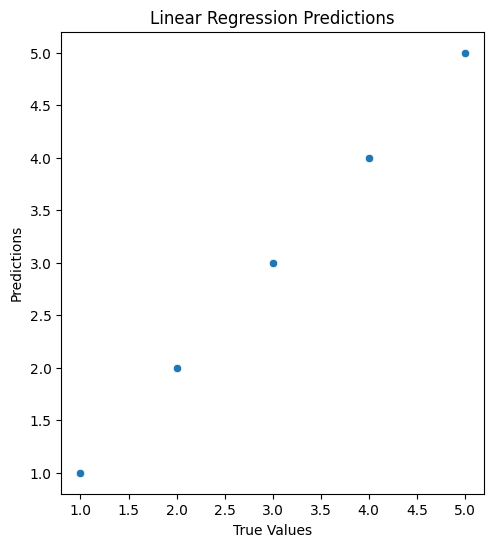

In [150]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.flatten(), y=y_predict.flatten())
plt.title('Linear Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()